In [2]:
import cv2
import numpy as np
import PIL
import matplotlib.pyplot as plt
import pandas
import torch
import torch.nn as nn
from torch.nn import functional as F
import torchvision
from torchvision.io import read_image
from torch.utils.data import Dataset, random_split,DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor,v2
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import PIL

In [ ]:
class HandwritingRecogniser(nn.Module):
    """
    Input Shape: (28,28)
    Output classes: 9
    """
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,stride=1,padding="same"), #(32,28,28)
            nn.BatchNorm2d(32), #(32,28,28)
            nn.ReLU() 
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding="same"), #(64,28,28)
            nn.BatchNorm2d(64), #(64,28,28)
            nn.ReLU()
        )
        self.res1 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=64,kernel_size=(3,3),stride=1,padding="same"),
            nn.ReLU(),
            nn.Conv2d(in_channels=64,out_channels=64,kernel_size=(3,3),stride=1,padding="same"),
            nn.ReLU(),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding="same"), #(128,28,28)
            nn.BatchNorm2d(128), #(128,28,28)
            nn.MaxPool2d(2), # (128,14,14)
            nn.ReLU()
        )
        self.classification = nn.Sequential(
            nn.Flatten(), #(1,25088)
            nn.Linear(in_features=25088,out_features=1024,bias=True),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features=1024,out_features=256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features=256,out_features=len(test.classes)),
            nn.Softmax(dim=1)
        )
    def forward(self,X):
        out = self.conv1(X)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        logits = self.classification(out)
        return logits

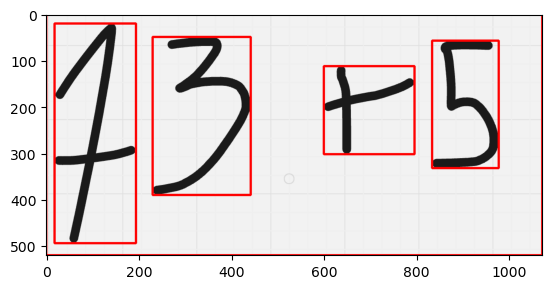

In [3]:
# draw boxes on image wherever you can find any value
def draw_boxes(image, boxes, color=(255, 0, 0), thickness=3):
    for box in boxes:
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), color, thickness)
    return image
img = cv2.imread("Screenshot 2024-09-21 at 16.06.01.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
boxes = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    print(x,y,w,h)
    boxes.append([x, y, x+w, y+h])
    # show me cropped image
    cropped = img[y:y+h, x:x+w]
    cropped = cv2.resize(cropped, (28, 28))
    ret, thresh = cv2.threshold(cropped, 127, 255, 0)
img = draw_boxes(img, boxes)
plt.imshow(img)

In [10]:
eval("1 + 2")

3

In [13]:
def parse_equations(equation):
    equation = equation.strip()
    equation = equation.replace("plus", "+")
    equation = equation.replace("minus", "-")
    equation = equation.replace("star", "*")
    equation = equation.replace("slash", "/")
    return equation

eval(parse_equations("1 star 2"))

2

In [5]:
eval("73 + 5")

78